## FE & EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### loading the data

In [2]:
df = pd.read_csv('../data Raw/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### ---------appraoch to the FE&EDA-------------

In [6]:
### So far ocean proximity is the only categorical feature in our dataset
### an I will use label encoding for that one
### I will substitute the nan values in total_bedroom columns
### then the rest I will do by looking at the features and their qq plot
### I will make new columns for the correaltions like
### bedrooms_per_room, households_per_bedroom, population_per_household

### -----------------FE&EDA--------------------

### Ocean proximity columns

In [7]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
df['ocean_proximity'].isna().sum()

0

In [9]:
ocean_proxim = {
    '<1H OCEAN' : 1,
    'INLAND' : 0,
    'NEAR BAY' : 2,
    'NEAR OCEAN' : 3,
    'ISLAND' : 5
}

In [10]:
df['ocean_proximity'] = df['ocean_proximity'].map(ocean_proxim)

In [11]:
df['ocean_proximity'].value_counts()

ocean_proximity
1    9136
0    6551
3    2658
2    2290
5       5
Name: count, dtype: int64

In [12]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2


### Handling nan in total_bedrrom

In [13]:
df['total_bedrooms'].value_counts()

total_bedrooms
280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
2961.0     1
1915.0     1
1215.0     1
3298.0     1
1052.0     1
Name: count, Length: 1923, dtype: int64

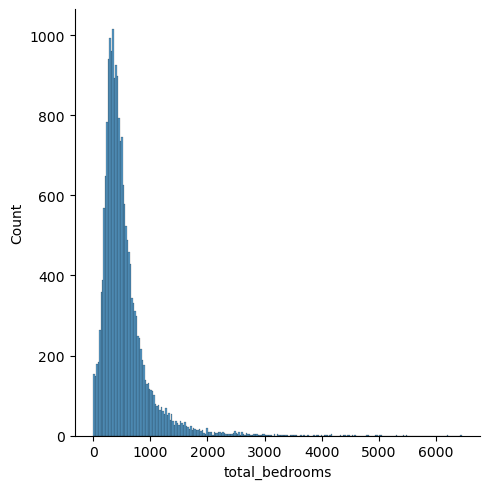

In [14]:
sns.displot(df['total_bedrooms'])

In [16]:
df['total_bedrooms'].median()

435.0

In [17]:
### substituting the nan with the median
### because there aren't a lot of missing nan values

In [19]:
df['total_bedrooms'].fillna(435.0, inplace = True)

In [20]:
df['total_bedrooms'].isna().sum()

0

In [21]:
df['total_bedrooms'].value_counts()

total_bedrooms
435.0     244
280.0      55
331.0      51
345.0      50
343.0      49
         ... 
2961.0      1
1915.0      1
1215.0      1
3298.0      1
1052.0      1
Name: count, Length: 1923, dtype: int64

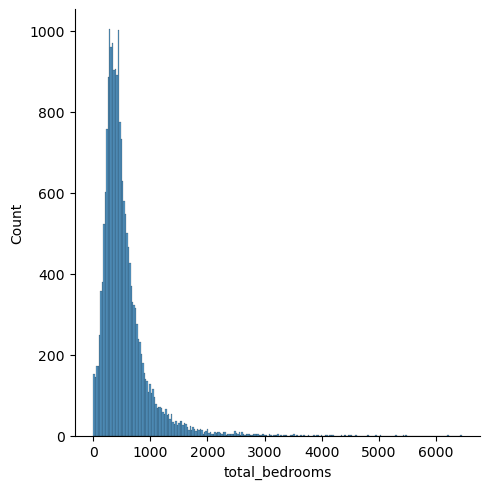

In [22]:
sns.displot(df['total_bedrooms'])

In [23]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2


In [24]:
corr = df.corr()['median_house_value'].sort_values(ascending = False)
print(corr)

median_house_value    1.000000
median_income         0.688075
ocean_proximity       0.383280
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049457
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


### making the new columns and dropping the older ones

In [25]:
df['rooms_per_bedroom'] = df['total_rooms'] / df['total_bedrooms']

In [27]:
df['rooms_per_bedroom'] = df['rooms_per_bedroom'].astype(int)

In [28]:
df['rooms_per_bedroom'].value_counts()

rooms_per_bedroom
4     6685
5     5948
3     3538
6     2610
7      908
2      574
8      235
1       86
9       19
10      13
11       5
0        5
12       3
14       3
13       2
15       2
20       1
23       1
18       1
26       1
Name: count, dtype: int64

In [29]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_bedroom
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2,6
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2,6
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2,7
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2,5
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2,5


In [30]:
df['population_per_household'] = df['population'] / df['households']

In [31]:
df['population_per_household'] = df['population_per_household'].astype(int)

In [32]:
df['population_per_household'].value_counts()

population_per_household
2       10984
3        6273
1        1630
4        1404
5         231
6          45
7          17
9           9
12          8
8           7
13          4
18          3
0           3
10          3
11          2
15          2
16          2
599         1
33          1
1243        1
502         1
51          1
63          1
230         1
14          1
17          1
83          1
41          1
21          1
19          1
Name: count, dtype: int64

In [33]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2,6,2
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2,6,2
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2,7,2
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2,5,2
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2,5,2


In [34]:
df['bedroom_per_household'] = df['total_bedrooms'] / df['households']
df['bedroom_per_household'] = df['bedroom_per_household'].astype(int)

In [35]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household,bedroom_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2,6,2,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2,6,2,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2,7,2,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2,5,2,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2,5,2,1


In [36]:
df['room_per_household'] = df['total_rooms'] / df['households']
df['room_per_household'] = df['room_per_household'].astype(int)

In [37]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household,bedroom_per_household,room_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,2,6,2,1,6
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,2,6,2,0,6
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,2,7,2,1,8
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,2,5,2,1,5
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,2,5,2,1,6


### dropping the features

In [39]:
df.drop(['total_rooms', 'total_bedrooms', 'population', 'households'], axis = 1, inplace = True)
df.head()

,longitude,latitude,housing_median_age,median_income,median_house_value,ocean_proximity,rooms_per_bedroom,population_per_household,bedroom_per_household,room_per_household
0,-122.23,37.88,41.0,8.3252,452600.0,2,6,2,1,6
1,-122.22,37.86,21.0,8.3014,358500.0,2,6,2,0,6
2,-122.24,37.85,52.0,7.2574,352100.0,2,7,2,1,8
3,-122.25,37.85,52.0,5.6431,341300.0,2,5,2,1,5
4,-122.25,37.85,52.0,3.8462,342200.0,2,5,2,1,6


In [40]:
corr = df.corr()['median_house_value'].sort_values(ascending = False)
print(corr)

median_house_value          1.000000
median_income               0.688075
ocean_proximity             0.383280
rooms_per_bedroom           0.359648
room_per_household          0.151219
housing_median_age          0.105623
population_per_household   -0.024399
bedroom_per_household      -0.039430
longitude                  -0.045967
latitude                   -0.144160
Name: median_house_value, dtype: float64


### QQ plot and outliers part

In [41]:
import pylab
import scipy.stats as stat

In [42]:
def plot_qq(df, feature) : 
    plt.figure(figsize = (10, 6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist = 'norm', plot = pylab)
    plt.show()